In [1]:
import tensorflow as tf

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [6]:
dataset = "./deepfake_database.zip"
import zipfile
with zipfile.ZipFile(dataset, 'r') as zip_ref:
    zip_ref.extractall('./')

In [7]:
import numpy as np 
import matplotlib.pyplot as plt

In [9]:
"""
One case when it might be nice to use train_on_batch is for updating a pre-trained model on a single new batch of samples. Suppose you've already trained and deployed a model, and sometime later you've received a new set of training samples previously never used. You could use train_on_batch to directly update the existing model only on those samples. Other methods can do this too, but it is rather explicit to use train_on_batch for this case.
"""
print()

In [10]:
from tensorflow.keras.models import Model

In [11]:
class Classifier:
    def __init__(self) -> None:
        self.model = 0
    def predict(self,x):
        return self.model.predict(x)
    def fit(self,x,y):
        return self.model.train_on_batch(x,y)
    def get_accuracy(self,x,y):
        return self.model.test_on_batch(x,y)
    def load(self, path):
        self.model.load_weights(path)

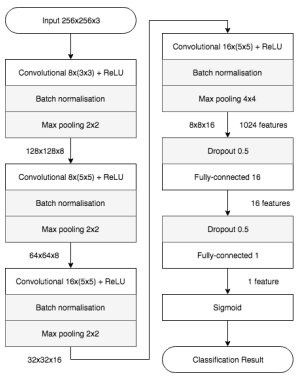

In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization,Dense, Flatten,MaxPooling2D, Dropout, Reshape, concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
#image_dimensions = {'height':256, 'width':256, 'channels':3}
class Meso4(Classifier):
    def __init__(self,lr=0.001):
        self.model = self.init_model()
        optimizer = Adam(learning_rate=lr)
        self.model.compile(optimizer=optimizer, loss = 'mean_squared_error', metrics = ['accuracy'])
    
    def init_model(self):
        x = Input(shape=(256,256,3))
#1
        x1 = Conv2D(8,(3,3), padding='same', activation='relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2,2), padding='same')(x1)
#2
        x2 = Conv2D(8,(5,5), padding='same', activation='relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2,2), padding='same')(x2)
#3
        x3 = Conv2D(16,(5,5), padding='same', activation='relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2,2), padding='same')(x3)

#4
        x4 = Conv2D(16,(5,5), padding='same', activation='relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4,4), padding='same')(x4)
#Output
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation='sigmoid')(y)

        return Model(inputs = x, outputs = y)        




Importing pretrained Model Meso4 model Weights

In [22]:
meso = Meso4()
meso.load('./weights/Meso4_DF.h5')

In [23]:
dataGenerator = ImageDataGenerator(rescale=1./255)
generator = dataGenerator.flow_from_directory(
    './deepfake_database/deepfake_database/train_test/',
    target_size=(256,256),batch_size=1,class_mode='binary'
)

Found 12353 images belonging to 2 classes.


In [24]:
generator.class_indices

{'df': 0, 'real': 1}

Predicted likelihood: 1.0000
Actual label: 1

Correct prediction: True


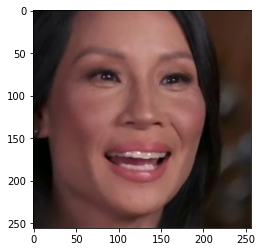

In [25]:
# Rendering image X with label y for MesoNet
X, y = generator.next()

# Evaluating prediction
print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(meso.predict(X)[0][0])==y[0]}")

# Showing image
plt.imshow(np.squeeze(X));